<img src='Abnb_logo.jpg'>

In [46]:
import requests
from bs4 import BeautifulSoup
import time

In [3]:
url = "https://www.airbnb.com.pe/s/Paris/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=5&query=Par%C3%ADs%2C%20Francia&place_id=ChIJD7fiBh9u5kcRYJSMaMOCCwQ&date_picker_type=calendar&checkin=2023-04-19&checkout=2023-04-22&adults=1&source=structured_search_input_header&search_type=autocomplete_click"

r = requests.get(url)

r.status_code

s = BeautifulSoup(r.text,'lxml')


from selenium import webdriver
from selenium.webdriver import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By

In [4]:
options = webdriver.ChromeOptions()
options.add_argument("--incognito")

driver = webdriver.Chrome(executable_path=r"F:\\Chrome driver\\chromedriver.exe", options = options)

driver.get(url)

<ipython-input-4-1fd30b10088d>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"F:\\Chrome driver\\chromedriver.exe", options = options)


In [194]:
def obtener_info():
    """
    funchon que retorna lista de dicc con info de escalas p
    """
    titles = []
    precios = []
    precios_noche = []
    camas = []
    hallazgos = []
    
    rates = []
    cantidad_rates_airbnb = []
    
    ### Este es el bloque dond se sencuentra tiulo, precio, camas rate etc
    bloques = driver.find_elements(By.XPATH, "//div[@class='g1qv1ctd cb4nyux dir dir-ltr']")
    bloques = bloques[:4]
    
    ### Este es e bloque dodne se enecuntra HALLAGOS
    bloques_hallazgo = driver.find_elements(By.XPATH, "//div[@class='c14dgvke dir dir-ltr']")
    bloques_hallazgo = bloques_hallazgo[:4]
    
    
    ## para bloque en bloquese encontramos titulo, rpecio, etc
    for x in bloques:   
        time.sleep(1)
        precio_total = x.find_element(By.XPATH, ".//div[@class='_tt122m']")
        precio_total = precio_total.find_element(By.XPATH, ".//span[@aria-hidden='true']")
        precio_total = precio_total.text
        
        precio_total = precio_total.split()
        vaina_1 = precio_total[0]
        vaina_2 = vaina_1[2:]

        # Tienes que eliminar las comas de los precios 

        coma=[",","S","$","U","/"]
        res=[j for i,j in enumerate(vaina_2) if j not in coma]
        price = "".join(res)
        price = int(price)
        
        time.sleep(1.6)
                
        
        
                ### precio x noche, ya que este a veces no se encuentra usamos un TRY
        try: 
            precio_noche = x.find_element(By.XPATH, ".//span[@class='_tyxjp1']")
            time.sleep(0.6)
            precio_noche = precio_noche.text
            precio_noche = precio_noche.split()
            vaina_1_n = precio_noche[0]
        except:
            precio_noche = x.find_element(By.XPATH, ".//span[@class='_1y74zjx']")
            time.sleep(0.6)
            precio_noche = precio_noche.text
            precio_noche = precio_noche.split()
            vaina_1_n = precio_noche[0]
        
        #### OJO todo depende de la moneda en la que esté la vaina esta, si está en euro o sol peude que sea diferente
        vaina_2_n = vaina_1_n[2:]

        # Tienes que eliminar las comas de los precios 

        coma=[",","S","$","U","/"]
        res=[j for i,j in enumerate(vaina_2) if j not in coma]
        price_n = "".join(res)
        price_n = int(price_n)
        
        time.sleep(1)
        
        cama = x.find_element(By.XPATH, ".//div[@class='f15liw5s s1cjsi4j dir dir-ltr'][2]")
        cama = cama.find_element(By.XPATH, ".//span[@class=' dir dir-ltr']")
        cama = cama.text
        cama = cama.split()
        cama = cama[0]
        time.sleep(1)

        title = x.find_element(By.XPATH, ".//div[@data-testid='listing-card-title']")
        title = title.text
        time.sleep(1)
        
        ## como algunos son neuvos no tienen rates
        try: 
            rate = x.find_element(By.XPATH, ".//span[@class='r1dxllyb dir dir-ltr']")
            rate = rate.text
            rate = rate.split()
            rate_1 = rate[0]
            rate_1 = float(rate_1)
            cantidad_rates = rate[1]
            
            coma=[",","(",")","U","/"]
            res=[j for i,j in enumerate(cantidad_rates) if j not in coma]
            cantidad_rates = "".join(res)
            cantidad_rates = int(cantidad_rates)
            
            cantidad_rates_airbnb.append(cantidad_rates)
            time.sleep(0.6)
            rates.append(rate_1)
            time.sleep(0.6)
            
        except:
            cantidad_rates_airbnb.append("Nuevo")
            time.sleep(0.6)
            rates.append("Nuevo")
            time.sleep(0.6)
                
        titles.append(title)
        time.sleep(0.6)
        
        precios.append(price)        
        time.sleep(0.6)
        
        precios_noche.append(price_n)        
        time.sleep(0.6)
        
        camas.append(cama)        
        time.sleep(0.6)
        

        ## como los hallazgos estna en otor loque uso ese bloque
    for z in bloques_hallazgo:
        time.sleep(0.6)
        try:
            time.sleep(0.6)
            hallazgo_a = z.find_element(By.XPATH, ".//div[@class='t1mwk1n0 dir dir-ltr']")
            time.sleep(0.7)
            hallazgo_a = hallazgo_a.text
            time.sleep(0.7)
            hallazgos.append(hallazgo_a)
            
        except: 
            time.sleep(0.6)
            hallazgos.append(None)
            time.sleep(0.6)
            pass
            

SyntaxError: unexpected EOF while parsing (<ipython-input-194-5d8a6e416021>, line 33)

In [37]:
bloques = driver.find_elements(By.XPATH, "//div[@class='g1qv1ctd cb4nyux dir dir-ltr']")

In [38]:
len(bloques)

18

In [54]:
for x in bloques:   
    precio_total = x.find_element(By.XPATH, "//div[@class='_tt122m']")
    precio_total = precio_total.find_element(By.XPATH, ".//span[@aria-hidden='true']")
    precio_noche = x.find_element(By.XPATH, "//span[@class='_tyxjp1']")

In [55]:
precio_total.text

'S/654 en total'

In [56]:
precio_noche.text

'S/192 '

In [59]:
for x in bloques:   
    cama = x.find_element(By.XPATH, "//div[@class='f15liw5s s1cjsi4j dir dir-ltr'][2]")
    cama = cama.find_element(By.XPATH, ".//span[@class=' dir dir-ltr']")

In [60]:
cama.text

'1 cama individual'

In [62]:
bloque_scrapear = bloques[1]

In [73]:
title = bloque_scrapear.find_element(By.XPATH, ".//div[@data-testid='listing-card-title']")

In [74]:
title.text

'Habitación privada en París'

In [75]:
rate = bloque_scrapear.find_element(By.XPATH, ".//span[@class='r1dxllyb dir dir-ltr']")


In [76]:
rate.text

'4.67 (111)'

In [71]:
# para SUPERANFITRION O HALLAZGO EXCEPT       PON UN TRYYYYY
hallazgo_ = bloque_scrapear.find_element(By.XPATH, ".//div[@class='t1mwk1n0 dir dir-ltr']")

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":".//div[@class='t1mwk1n0 dir dir-ltr']"}
  (Session info: chrome=105.0.5195.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x0114DF13+2219795]
	Ordinal0 [0x010E2841+1779777]
	Ordinal0 [0x00FF423D+803389]
	Ordinal0 [0x01023025+995365]
	Ordinal0 [0x010231EB+995819]
	Ordinal0 [0x01019531+955697]
	Ordinal0 [0x0103E844+1108036]
	Ordinal0 [0x010194B4+955572]
	Ordinal0 [0x0103EA14+1108500]
	Ordinal0 [0x0104F192+1175954]
	Ordinal0 [0x0103E616+1107478]
	Ordinal0 [0x01017F89+950153]
	Ordinal0 [0x01018F56+954198]
	GetHandleVerifier [0x01442CB2+3040210]
	GetHandleVerifier [0x01432BB4+2974420]
	GetHandleVerifier [0x011E6A0A+565546]
	GetHandleVerifier [0x011E5680+560544]
	Ordinal0 [0x010E9A5C+1808988]
	Ordinal0 [0x010EE3A8+1827752]
	Ordinal0 [0x010EE495+1827989]
	Ordinal0 [0x010F80A4+1867940]
	BaseThreadInitThunk [0x765A00F9+25]
	RtlGetAppContainerNamedObjectPath [0x777D7BBE+286]
	RtlGetAppContainerNamedObjectPath [0x777D7B8E+238]


In [72]:
hallazgo_.text

'Superanfitrión'

In [112]:
bloques_img = driver.find_elements(By.XPATH,".//img[@class='_6tbg2q'][1]")

In [113]:
len(bloques_img)

18

In [115]:
#image = bloques_img[0].find_element(By.XPATH,".//img[@class='_6tbg2q']")
img_src = bloques_img[1].get_attribute("src")

In [116]:
img_src

'https://a0.muscache.com/im/pictures/7b0d2248-9bb9-455f-a4e8-5be5bdc3b247.jpg?im_w=720'

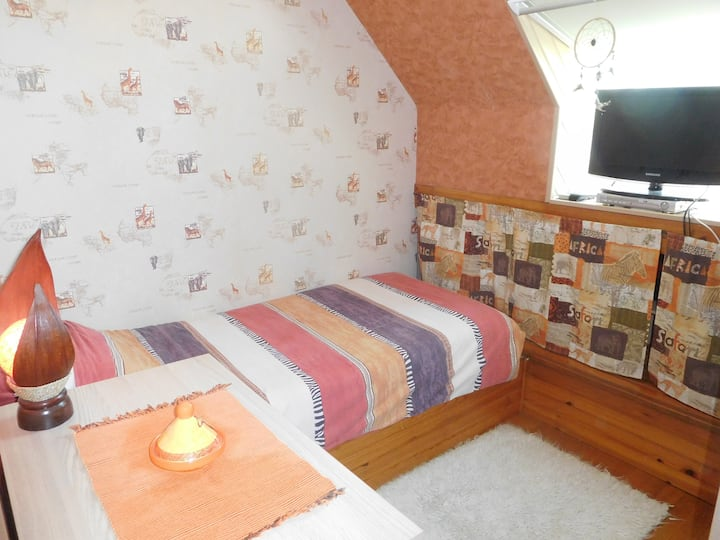

In [117]:
from IPython.display import Image

img_req = requests.get(img_src)

display(Image(img_req.content))

In [110]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

#print(WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.XPATH, "//div[@class='cjv59qb dir dir-ltr']/span[@class='_1h6n1zu']/img[@class='_6tbg2q']"))).get_attribute("src"))

In [69]:
def partes_llegas(lugar_partida):
    
    donde_partes = driver.find_element(By.XPATH, "//div[@class='f1xx50dm dir dir-ltr']")
    donde_partes.click()
    ## Le das a click en el boton donde dice "en cualqueir lguar del mundo" osea donde buscas el lugar donde vas a estar p
    
    time.sleep(0.7)
    #ivycze5 dir dir-ltr
    ### clcikeas en donde vas a escribir Just in case
    escribe_donde = driver.find_element(By.XPATH, "//input[@class='ivycze5 dir dir-ltr']")
    escribe_donde.click()
    
    lugars = lugar_partida
    
    ## Envias el nombre del lguar letra por letra
    for character in lugars:
        escribe_donde.send_keys(character)
        time.sleep(0.3)
    
    # clcikeas la primera opción, también puedes hacer un match del lugar exacto 
    clickea_el_primero = driver.find_element(By.XPATH, "//div[@class='_r1t6ga']")
    clickea_el_primero.click()


In [59]:
def repetir_mes_llegada(mes,dia):
    
    # clcik  en el button FECHA llegada a la ciudad o lugar
    # directamente se clickea, asi que aca no es necesario
    
    #departure_click = driver.find_element(By.XPATH, "//input[@id='departureDate']")
    #departure_click.click()
    #time.sleep(2)
    
    ## encotramos el boton par avanzar mes SIGUIENTE, este caos es el segundo, tambien est el arie-label  : Haz clic en la flecha de la derecha para cambiar al mes siguiente.
    bloque_button = driver.find_element(By.XPATH, "//div[@class='_qz9x4fc']")
    boton = bloque_button.find_element(By.XPATH, ".//button[@type='button']")
    ### mandamos el mes a LWOER
    mes = str(mes.lower())
    
    ## Cogemos los meses que aparecen en la webpage una vez hacemos click en fechas, en desktop son 2 mese sque aparecen 

    meses_llegada = driver.find_elements(By.XPATH, "//h2[@class='_14i3z6h']")
    time.sleep(1)
    meses_llegada = meses_llegada[1:3]
    meses_llegada_1 = []

    ## para cada mes en la lista de meses sacada arriba de la pagina, lo spliteamos, madnamos a lower y lo emtemos a una nueva lista
    for x in meses_llegada:
        texto = x.text
        time.sleep(1)
        texto = texto.split(" ")
        texto = texto[0].lower()
        meses_llegada_1.append(texto)
        time.sleep(1)

    ## en caso el mes enviado en la DEF está en la lista se le manda el día y se cliclea el día
    if mes in meses_llegada_1: 
        # el blqieu serían los calendarios de los 3 meses 
        bloque  = driver.find_elements(By.XPATH, "//table[@class='_cvkwaj']")
        time.sleep(1)
        # hay dos loques extras fantamsas por lo tanto solo nos quedamos con los necesarios
        bloque = bloque[1:3]
        time.sleep(1)
        ## BUSCAS POR "NAME" EN EL INDEX, osea busco por MES, dodne se posiciona para hacer el match
        indice = meses_llegada_1.index(mes)
        time.sleep(1)
        bloque = bloque[indice]
        time.sleep(1)
        llegada = bloque.find_elements(By.XPATH, ".//td[@role='button']")
        x = dia
        x = x-1    # te coje día +1 entonce sque sea *-1   esto por q tabaja con lista p y el indice comienza desde el 0 webas
        time.sleep(1)
        ## haces un amthc de dia igual que antes
        fecha_que_quiero = llegada[x]
        fecha_que_quiero.click()
        
        # si el mes enviado en el DEF NO ESTA en la lista, se clickea el boton "SIGUEITNE MES" hasta encontrarlo
    else:
        boton.click()
        time.sleep(1)
        boton.click()
        time.sleep(1)
        repetir_mes(mes,dia)
    
    

In [60]:
 def repetir_mes_salida(mes,dia):
    
    # clcik  en el button FECHA llegada a la ciudad o lugar
    # directamente se clickea, asi que aca no es necesario
    
    #departure_click = driver.find_element(By.XPATH, "//input[@id='departureDate']")
    #departure_click.click()
    #time.sleep(2)
    
    ## encotramos el boton par avanzar mes SIGUIENTE, este caos es el segundo, tambien est el arie-label  : Haz clic en la flecha de la derecha para cambiar al mes siguiente.
    bloque_button = driver.find_element(By.XPATH, "//div[@class='_qz9x4fc']")
    boton = bloque_button.find_element(By.XPATH, ".//button[@type='button']")
    ### mandamos el mes a LWOER
    mes = str(mes.lower())
    
    ## Cogemos los meses que aparecen en la webpage una vez hacemos click en fechas, en desktop son 2 mese sque aparecen 

    meses_llegada = driver.find_elements(By.XPATH, "//h2[@class='_14i3z6h']")
    time.sleep(1)
    meses_llegada = meses_llegada[1:3]
    meses_llegada_1 = []

    ## para cada mes en la lista de meses sacada arriba de la pagina, lo spliteamos, madnamos a lower y lo emtemos a una nueva lista
    for x in meses_llegada:
        texto = x.text
        time.sleep(1)
        texto = texto.split(" ")
        texto = texto[0].lower()
        meses_llegada_1.append(texto)
        time.sleep(1)

    ## en caso el mes enviado en la DEF está en la lista se le manda el día y se cliclea el día
    if mes in meses_llegada_1: 
        # el blqieu serían los calendarios de los 3 meses 
        bloque  = driver.find_elements(By.XPATH, "//table[@class='_cvkwaj']")
        time.sleep(1)
        # hay dos loques extras fantamsas por lo tanto solo nos quedamos con los necesarios
        bloque = bloque[1:3]
        time.sleep(1)
        ## BUSCAS POR "NAME" EN EL INDEX, osea busco por MES, dodne se posiciona para hacer el match
        indice = meses_llegada_1.index(mes)
        time.sleep(1)
        bloque = bloque[indice]
        time.sleep(1)
        llegada = bloque.find_elements(By.XPATH, ".//td[@role='button']")
        x = dia
        x = x-1    # te coje día +1 entonce sque sea *-1   esto por q tabaja con lista p y el indice comienza desde el 0 webas
        time.sleep(1)
        ## haces un amthc de dia igual que antes
        fecha_que_quiero = llegada[x]
        fecha_que_quiero.click()
        
        # si el mes enviado en el DEF NO ESTA en la lista, se clickea el boton "SIGUEITNE MES" hasta encontrarlo
    else:
        boton.click()
        time.sleep(1)
        boton.click()
        time.sleep(1)
        repetir_mes(mes,dia)
    

In [169]:
def cuantos_pajeros(adultos=None,ninos=None,bebes=None,perros=None):
    
    if adultos == 0:
        print("eres IDOTA?")
        return
    
    click_cuantos = driver.find_element(By.XPATH, "//div[@class='p1kudodg dir dir-ltr']")
    click_cuantos.click()
    time.sleep(1)
           

    boomers = driver.find_element(By.XPATH, "//div[@id='stepper-adults']")
    boomers_boton = boomers.find_element(By.XPATH, ".//button[@class='_ul9u8c'][2]")
    time.sleep(1)
    
    n = 0
    if adultos is None or adultos == 1:
        pass
    else:
        while n < adultos:
                n += 1
                time.sleep(0.3)
                boomers_boton.click()
    
    
    mocosos = driver.find_element(By.XPATH, ".//div[@id='stepper-children']")
    mocosos_boton = mocosos.find_element(By.XPATH, ".//button[@class='_ul9u8c'][2]")
    time.sleep(1)
    n = 0
    if ninos == 0 or ninos == None:
        pass
    else:
        while n < ninos:
            n += 1
            time.sleep(0.4)
            mocosos_boton.click()

    time.sleep(1.7)
       
    wawas = driver.find_element(By.XPATH, ".//div[@id='stepper-infants']")
    wawas_boton = wawas.find_element(By.XPATH, ".//button[@class='_ul9u8c'][2]")
    time.sleep(1)
    n = 0
    if bebes == 0 or bebes == None:
        pass
    else:
        while n < bebes:
            n += 1
            time.sleep(0.6)
            wawas_boton.click()
            
    time.sleep(1.7)
 

    mascotas = driver.find_element(By.XPATH, ".//div[@id='stepper-pets']")
    mascotas_boton = mascotas.find_element(By.XPATH, ".//button[@class='_ul9u8c'][2]")
    time.sleep(1)
    n = 0
    if perros == 0 or perros == None:
        pass
    else:
        while n < perros:
            n += 1
            time.sleep(0.6)
            mascotas_boton.click()
            
    time.sleep(1.7)

    ### esto lo hago para salir del lguar donde nos encontramos 
    #action = webdriver.ActionChains(driver)
   # action.move_by_offset(10,10).click().perform()

    #time.sleep(0.7)


In [176]:
def click_buscar():
    
    buscaras = driver.find_element(By.XPATH, "//span[@class='t1l18xbv dir dir-ltr']")
    buscaras.click()

In [172]:
partes_llegas("Paris")

In [173]:
repetir_mes_llegada("abril",25)

In [174]:
repetir_mes_salida("abril",29)

In [175]:
cuantos_pajeros(2,1,1,1)

In [177]:
click_buscar()
## IATAAAA IATAAAAA YOOOOOOOOOO

In [50]:
buscaras = driver.find_element(By.XPATH, "//div[@class='c8th90 dir dir-ltr']")

In [131]:
    boomers = driver.find_element(By.XPATH, "//div[@id='stepper-adults']")
    boomers = boomers.find_element(By.XPATH, ".//button[@type='button']")
    time.sleep(1)
    
    adultos = 2
    
    n = 0
    if adultos is None or adultos == 1:
        pass
    else:
        while n < adultos-1:
                n += 1
                time.sleep(0.3)
                boomers.click()

In [90]:
boomers

<selenium.webdriver.remote.webelement.WebElement (session="eb6ed9ebaa5086cb178fba3aaf735041", element="816a0398-7446-4883-8201-dd3701e2ba71")>

In [132]:
    boomers = driver.find_element(By.XPATH, "//div[@id='stepper-adults']")
    #boomers = boomers.find_element(By.XPATH, ".//button[@data-testid='stepper-adults-increase-button']")
    boomers = boomers.find_element(By.XPATH, ".//button[@type='button'][2]")


In [133]:
boomers

<selenium.webdriver.remote.webelement.WebElement (session="eb6ed9ebaa5086cb178fba3aaf735041", element="eaa017b6-06f2-4c2d-9400-84136ad91ee3")>

In [136]:
boomers.click()

In [1]:
obtener_info()

In [279]:
    titles = []
    precios = []
    precios_noche = []
    camas = []
    hallazgos = []
    rates = []
    cantidad_rates_airbnb = []
    
    ### Este es el bloque dond se sencuentra tiulo, precio, camas rate etc
    bloques = driver.find_elements(By.XPATH, "//div[@class='g1qv1ctd cb4nyux dir dir-ltr']")
    bloques = bloques[:4]
    
    ### Este es e bloque dodne se enecuntra HALLAGOS
    bloques_hallazgo = driver.find_elements(By.XPATH, "//div[@class='c14dgvke dir dir-ltr']")
    bloques_hallazgo = bloques_hallazgo[:4]
    
    
    ## para bloque en bloquese encontramos titulo, rpecio, etc
    for x in bloques:   
        time.sleep(1)
        precio_total = x.find_element(By.XPATH, ".//div[@class='_tt122m']")
        precio_total = precio_total.find_element(By.XPATH, ".//span[@aria-hidden='true']")
        precio_total = precio_total.text
        
        precio_total = precio_total.split()
        vaina_1 = precio_total[0]
        vaina_2 = vaina_1[2:]

        # Tienes que eliminar las comas de los precios 

        coma=[",","S","$","U","/"]
        res=[j for i,j in enumerate(vaina_2) if j not in coma]
        price = "".join(res)
        price = int(price)
        
        time.sleep(1.6)
                
        
        
                ### precio x noche, ya que este a veces no se encuentra usamos un TRY
        try: 
            precio_noche = x.find_element(By.XPATH, ".//span[@class='_tyxjp1']")
            time.sleep(0.6)
            precio_noche = precio_noche.text
            precio_noche = precio_noche.split()
            vaina_1_n = precio_noche[0]
        except:
            precio_noche = x.find_element(By.XPATH, ".//span[@class='_1y74zjx']")
            time.sleep(0.6)
            precio_noche = precio_noche.text
            precio_noche = precio_noche.split()
            vaina_1_n = precio_noche[0]
        
        #### OJO todo depende de la moneda en la que esté la vaina esta, si está en euro o sol peude que sea diferente
        vaina_2_n = vaina_1_n[2:]

        # Tienes que eliminar las comas de los precios 

        coma=[",","S","$","U","/"]
        res=[j for i,j in enumerate(vaina_2) if j not in coma]
        price_n = "".join(res)
        price_n = int(price_n)
        
        time.sleep(1)
        
        cama = x.find_element(By.XPATH, ".//div[@class='f15liw5s s1cjsi4j dir dir-ltr'][2]")
        cama = cama.find_element(By.XPATH, ".//span[@class=' dir dir-ltr']")
        cama = cama.text
        cama = cama.split()
        cama = cama[0]
        time.sleep(1)

        title = x.find_element(By.XPATH, ".//div[@data-testid='listing-card-title']")
        title = title.text
        time.sleep(1)
        
        ## como algunos son neuvos no tienen rates
        try: 
            rate = x.find_element(By.XPATH, ".//span[@class='r1dxllyb dir dir-ltr']")
            rate = rate.text
            rate = rate.split()
            rate_1 = rate[0]
            rate_1 = float(rate_1)
            cantidad_rates = rate[1]
            
            coma=[",","(",")","U","/"]
            res=[j for i,j in enumerate(cantidad_rates) if j not in coma]
            cantidad_rates = "".join(res)
            cantidad_rates = int(cantidad_rates)
            
            cantidad_rates_airbnb.append(cantidad_rates)
            time.sleep(0.6)
            rates.append(rate_1)
            time.sleep(0.6)
            
        except:
            cantidad_rates_airbnb.append("Nuevo")
            time.sleep(0.6)
            rates.append("Nuevo")
            time.sleep(0.6)
                
        titles.append(title)
        time.sleep(0.6)
        
        precios.append(price)        
        time.sleep(0.6)
        
        precios_noche.append(price_n)        
        time.sleep(0.6)
        
        camas.append(cama)        
        time.sleep(0.6)
        

        ## como los hallazgos estna en otor loque uso ese bloque
    for z in bloques_hallazgo:
        time.sleep(0.6)
        try:
            time.sleep(0.6)
            hallazgo_a = z.find_element(By.XPATH, ".//div[@class='t1mwk1n0 dir dir-ltr']")
            time.sleep(0.7)
            hallazgo_a = hallazgo_a.text
            time.sleep(0.7)
            hallazgos.append(hallazgo_a)
            
        except: 
            time.sleep(0.6)
            hallazgos.append(None)
            time.sleep(0.6)
            pass
            

In [280]:
titles

['Apartamento en Clichy',
 'Habitación de hotel en París',
 'Apartamento en París',
 'Apartamento en París']

In [281]:
precios

[1715, 5499, 3561, 2512]

In [282]:
precios_noche

[1715, 5499, 3561, 2512]

In [283]:
camas

['2', '2', '2', '1']

In [284]:
hallazgos

['Un hallazgo excepcional', None, None, 'Un hallazgo excepcional']

In [285]:
rates

[['4.48', '(115)'], ['4.92', '(145)'], 'Nuevo', ['4.78', '(32)']]

In [286]:
cantidad_rates_airbnb

['(115)', '(145)', 'Nuevo', '(32)']

In [213]:
vaina = 'S/5,499 en total'

In [214]:
vaina_1 = vaina.split()

In [215]:
vaina_1

['S/5,499', 'en', 'total']

In [216]:
vaina2 = vaina_1[0]

In [217]:
vaina2

'S/5,499'

In [219]:
vaina3 = vaina2[2:]

In [220]:
vaina3

'5,499'

In [222]:
float(vaina3)

ValueError: could not convert string to float: '5,499'

In [223]:
vaina_1 = vaina.split()
vaina2 = vaina_1[0]
vaina3 = vaina2[2:]


# Tienes que eliminar las comas de los precios que tengan mas o igual de 1000 xq hay una COMA

coma=[",","S","$","U",/]
res=[j for i,j in enumerate(price) if j not in coma]
price = "".join(res)

In [225]:
price

'5499'

In [226]:
int(price)

5499

In [277]:
hallazgos = []

bloques_hallazgo = driver.find_elements(By.XPATH, "//div[@class='c14dgvke dir dir-ltr']")
bloques_hallazgo = bloques_hallazgo[0:4]

#hallazgo_a = bloques[0].find_element(By.XPATH, ".//div[@class='t1mwk1n0 dir dir-ltr']")
for z in bloques_hallazgo:
        time.sleep(0.6)
        try:
            time.sleep(0.6)
            hallazgo_a = z.find_element(By.XPATH, ".//div[@class='t1mwk1n0 dir dir-ltr']")
            time.sleep(0.7)
            hallazgo_a = hallazgo_a.text
            time.sleep(0.7)
            hallazgos.append(hallazgo_a)
            
        except: 
            time.sleep(0.6)
            hallazgos.append(None)
            time.sleep(0.6)
            pass


In [278]:
hallazgos

[None, None, None, None]

In [ ]:
bloques_hallazgo = driver.find_elements(By.XPATH, "//div[@class='c14dgvke dir dir-ltr']")

In [266]:
bloques = driver.find_elements(By.XPATH, "//div[@class='g1qv1ctd cb4nyux dir dir-ltr']")
bloques = bloques[:4]        
        
rate = bloques[0].find_element(By.XPATH, ".//span[@class='r1dxllyb dir dir-ltr']")
rate = rate.text
rate = rate.split()
rate_1 = rate[0]
cantidad_rates = rate[1]




In [267]:
rate_1

'4.48'

In [268]:
cantidad_rates

'(115)'

In [291]:
k = "4.48"

In [293]:
float(k)

4.48

## SACAR INFO DE CADA AIRBNB,
##### haciendo click en cada airbnb y scrapear sus vainas

In [5]:
import requests
from bs4 import BeautifulSoup
import time

In [62]:
#url = "https://www.airbnb.com.pe/s/Paris/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=5&query=Par%C3%ADs%2C%20Francia&place_id=ChIJD7fiBh9u5kcRYJSMaMOCCwQ&date_picker_type=calendar&checkin=2023-04-19&checkout=2023-04-22&adults=1&source=structured_search_input_header&search_type=autocomplete_click"
url= "https://www.airbnb.com.pe/rooms/710789383048240528?adults=1&check_in=2023-04-19&check_out=2023-04-22&federated_search_id=46fe1005-a6b6-4c5c-9f9d-8f4f2b66e20c&source_impression_id=p3_1676838689_a%2BpLM6Ws3w9IR4x5"
r = requests.get(url)

r.status_code

s = BeautifulSoup(r.text,'lxml')


from selenium import webdriver
from selenium.webdriver import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By

In [63]:
options = webdriver.ChromeOptions()
options.add_argument("--incognito")

driver = webdriver.Chrome(executable_path=r"F:\\Chrome driver\\chromedriver.exe", options = options)

driver.get(url)

<ipython-input-63-1fd30b10088d>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"F:\\Chrome driver\\chromedriver.exe", options = options)


In [8]:
    ### Estas listas serían demasiado??? 
    huespedes = []
    banos = []
    verificados = []
    
    limpieza_rate = []
    comunicacion_rate = []
    llegada_rate = []
    fiabilidad_rate = []
    ubicacion_rate = []
    precio_rate = []
    
    reviews_lista=[]
    que_suerte = []
    
    aircover = []
    
    ### Este es el bloque dond se sencuentra tiulo, precio, camas rate etc
    bloques = driver.find_elements(By.XPATH, "//div[@class='g1qv1ctd cb4nyux dir dir-ltr']")
    bloques = bloques[:2]
    
    ### Este es e bloque dodne se enecuntra HALLAGOS o la IMAGEN de cada abnb esa cosa
    bloques_hallazgo = driver.find_elements(By.XPATH, "//div[@class='c14dgvke dir dir-ltr']")
    bloques_hallazgo = bloques_hallazgo[:2]
    
    
    ## para bloque en bloques encontramos titulo, rpecio, etc
    for x in bloques_hallazgo:   
        time.sleep(0.6)
        x.click()
        
        print(driver.current_url)
        
        driver.switch_to.window(driver.window_handles[1])
        
        try:
            cerrar_pop_up = driver.find_elements(By.XPATH, "//path[@d='m6 6 20 20']")
            cerrar_pop_up.click()
            
        except:
            pass
    
        bloque_basicos = driver.find_element(By.XPATH, "//ol[@class='lgx66tx dir dir-ltr']")
        bloque_basicos = bloque_basicos.find_elements(By.XPATH, "//li[@class='l7n4lsf dir dir-ltr']")

        huespedes_ = bloque_basicos[0].text
        huespedes.append(huespedes_)

        banos_ = bloque_basicos[3].text
        banos.append(banos_)

        try:
            verificado = driver.find_element(By.XPATH, "//div[@class='l1dfad8f dir dir-ltr']")
            verificado = verificado.text
            verificados.append(verificado)
        except:
            pass


        ## sacnado rates
        rates_limpieza_eso = driver.find_element(By.XPATH, "//ol[@class='ciubx2o dir dir-ltr']")       
        rates_limpieza_eso = rates_limpieza_eso.find_elements(By.XPATH, ".//span[@class='_4oybiu']") 

        limpieza_rate.append(rates_limpieza_eso[0].text)
        fiabilidad_rate.append(rates_limpieza_eso[1].text)
        comunicacion_rate.append(rates_limpieza_eso[2].text)
        ubicacion_rate.append(rates_limpieza_eso[3].text)
        llegada_rate.append(rates_limpieza_eso[4].text)
        precio_rate.append(rates_limpieza_eso[5].text)


        ##  sacando las reviews
        boton_revs = driver.find_element(By.XPATH, "//button[@data-testid='pdp-show-all-reviews-button']")
        boton_revs.click()

        bloque_pop = driver.find_element(By.XPATH, "//div[@class='_14vzertx']")

         ## scrolleamos para que carguen todas resenas
        scroll = 0
        while scroll < 3:
            time.sleep(0.7)
            popup_reviews = driver.find_elements(By.CSS_SELECTOR, 'div[role=dialog] div[data-review-id]')
            driver.execute_script('arguments[0].scrollIntoView({block: "center", behavior: "smooth"});', popup_reviews[-1])
            time.sleep(0.7)
            scroll+=1


        bloque_revs = driver.find_element(By.XPATH, "//div[@class='_lao3nn']")    
        bloque_revs = bloque_revs.find_elements(By.XPATH, "//div[@class='r1are2x1 dir dir-ltr']") 

        ## ya que hay coemntarios del ANFITRION, tneemos q evitarlos por lo tanto coegmeos el mini boloque (donde se
        ## encuentra los comentarios y de vez en cuando la respsta del anfitrion <3), y dentro del minibloque
        ## escogemos solo el primer coment [1], que sería el del usuario que alquiló ese abnb
        
        lista_revs = []
        for u in bloque_revs:
            revs_usuarios = u.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr'][1]")
            time.sleep(0.7)
            texto = revs_usuarios.text
            lista_revs.append(texto)
            reviews_lista.append(lista_revs)
        
        ## vemos si "EL ALOJAMIENTO SUELE ESTAR RESERVADO"
        try:
            suerte = driver.find_element(By.XPATH, "//h2[@class='_mtn6h9x']")
            suerte_text = suerte.text

            que_suerte.append(suerte_text)
        except:
            pass
        
        ## Caso tenga AIRCOVER
        try:
            aircover_tiene = driver.find_element(By.XPATH, "//img[@class='l1li2ovm dir dir-ltr']")
            aircover.append("si")

        except:
            pass
        
 

https://www.airbnb.com.pe/s/Paris/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=3&query=Par%C3%ADs%2C%20Francia&place_id=ChIJD7fiBh9u5kcRYJSMaMOCCwQ&date_picker_type=calendar&checkin=2023-04-19&checkout=2023-04-22&adults=1&source=structured_search_input_header&search_type=user_map_move&ne_lat=48.90330313088239&ne_lng=2.439322564085387&sw_lat=48.77631170928487&sw_lng=2.2464717359146107&zoom=12&search_by_map=true
https://www.airbnb.com.pe/s/Paris/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=3&query=Par%C3%ADs%2C%20Francia&place_id=ChIJD7fiBh9u5kcRYJSMaMOCCwQ&date_picker_type=calendar&checkin=2023-04-19&checkout=2023-04-22&adults=1&source=structured_search_input_header&search_type=user_map_move&ne_lat=48.90330313088239&ne_lng=2.439322564085387&sw_lat=48.77631170928487&sw_lng=2.2464717359146107&zoom=12

In [6]:
    reviews_lista = []
    boton_revs = driver.find_element(By.XPATH, "//button[@data-testid='pdp-show-all-reviews-button']")
    boton_revs.click()
    
    bloque_pop = driver.find_element(By.XPATH, "//div[@class='_14vzertx']")
"""    for i in range(5):
        #driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", bloque_pop)
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)", bloque_pop)
        time.sleep(1.5)"""
    
    scroll = 0
"""    while scroll < 5: # scroll 5 times
        driver.execute_script('arguments[0].scrollTop = arguments[0].scrollTop + arguments[0].offsetHeight;', bloque_pop)
        time.sleep(1)
        scroll += 1"""

    popup_reviews = driver.find_elements(By.CSS_SELECTOR, 'div[role=dialog] div[data-review-id]')
    driver.execute_script('arguments[0].scrollIntoView({block: "center", behavior: "smooth"});', popup_reviews[-1])

    
    ## scrolleamos para que carguen todas resenas
    #driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

    bloque_revs = driver.find_element(By.XPATH, "//div[@class='_lao3nn']")    
    bloque_revs = bloque_revs.find_elements(By.XPATH, "//div[@class='r1are2x1 dir dir-ltr']") 
    #revs_usuarios = bloque_revs.find_elements(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr'][1]")
    
    ## ya que hay coemntarios del ANFITRION, tneemos q evitarlos por lo tantoi coegmeos el mini boloque, y dentro del minibloque
    ## escogemos solo el primer coment [1]
    
    for u in bloque_revs:
        revs_usuarios = u.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr'][1]")
        time.sleep(1)
        texto = revs_usuarios.text
        reviews_lista.append(texto)
                    
   # respuesta_anfitrion = bloque_revs.find_elements(By.XPATH, ".//div[@class='rco2uhc dir dir-ltr']")   

In [44]:
### Est efunciona, pero tienes que darle varias veces para que aparezcan todas las reviews (stackoverflow)

popup_reviews = driver.find_elements(By.CSS_SELECTOR, 'div[role=dialog] div[data-review-id]')
driver.execute_script('arguments[0].scrollIntoView({block: "center", behavior: "smooth"});', popup_reviews[-1])

In [9]:
### Est efunciona, pero tienes que darle varias veces para que aparezcan todas las reviews. Madre miaaaaa
bloque_pop = driver.find_elements(By.XPATH, "//div[@class='_14vzertx']")
#driver.execute_script('arguments[0].scrollTop = arguments[0].scrollTop + arguments[0].offsetHeight;', bloque_pop)
#driver.execute_script("window.scrollTo(0,document.body.scrollHeight)", bloque_pop)
#driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", bloque_pop)
driver.execute_script('arguments[0].scrollTop = arguments[0].scrollTop + arguments[0].offsetHeight;', bloque_pop)

In [12]:
reviews_lista = []

boton_revs = driver.find_element(By.XPATH, "//button[@data-testid='pdp-show-all-reviews-button']")
boton_revs.click()

bloque_pop = driver.find_element(By.XPATH, "//div[@class='_14vzertx']")

scroll = 0
while scroll < 3:
    time.sleep(0.7)
    popup_reviews = driver.find_elements(By.CSS_SELECTOR, 'div[role=dialog] div[data-review-id]')
    driver.execute_script('arguments[0].scrollIntoView({block: "center", behavior: "smooth"});', popup_reviews[-1])
    time.sleep(0.7)
    scroll+=1

## scrolleamos para que carguen todas resenas

bloque_revs = driver.find_element(By.XPATH, "//div[@class='_lao3nn']")    
bloque_revs = bloque_revs.find_elements(By.XPATH, "//div[@class='r1are2x1 dir dir-ltr']") 

## ya que hay coemntarios del ANFITRION, tneemos q evitarlos por lo tantoi coegmeos el mini boloque, y dentro del minibloque
## escogemos solo el primer coment [1]

for u in bloque_revs:
    revs_usuarios = u.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr'][1]")
    time.sleep(0.7)
    texto = revs_usuarios.text
    reviews_lista.append(texto)

In [13]:
reviews_lista

['Muy cómodo, sector tranquilo y cercano del metro.',
 'Excelente ubicación y excelente trato por el personal. Un lugar muy tranquilo y demasiado cerca del metro',
 'El lugar tal como se describe en el anuncio, muy limpio, el wifi no es súper rápido pero funciona bien, todas las áreas correctas, los anfitriones amables, a pesar de no hablar mucho inglés, buscaban la forma de entender',
 'Un excelente lugar para pasar la noche, alojarse y conocer Paris. ¡Que genial haber encontrado este lugar!',
 'muy bien , volveré seguro , mercado, metro, todo cerca ... me ayudó mucho porque no hablaba francés ni inglés... gracias amigo Oss',
 'Pasé varias noches en casa de Guoxi y aprecié tener un dormitorio solo;)\nEl baño es funcional y la cocina es amplia pero no muy climatizada...\nAgradezco al anfitrión que me haya permitido aparcar la bicicleta dentro, porque viajaba a París todas las mañanas.',
 '¡Un alojamiento fantástico! ¡Guoxi es muy agradable y servicial! ¡No se puede pedir más!',
 'El an

In [31]:
suertes = []

suerte = driver.find_element(By.XPATH, "//h2[@class='_mtn6h9x']")
suerte_text = suerte.text

suertes.append(suerte_text)
que_suerte.append(suertes)

In [32]:
que_suerte

['¡Qué suerte!', ['¡Qué suerte!'], ['¡Qué suerte!']]

In [33]:
suertes

['¡Qué suerte!']

# te falt ahacer ersotototoottoto

identidad verif  /
promotor   /
idiomas ladra /
cancelacion /
Zonas de trabajos esas (3) webndas /
Cuando se registro el anfitrion  /
Costos HORMIGA  /
Servicios
LO QUE DEBES SBAER  
nombre del perro /
Dscto x estadia mensual /

In [55]:
idver

[]

In [23]:
textos_identidad = ["identidad","verified"]
t3 = "identidad verificada"

In [30]:
#res = [j for i,j in enumerate(t3) if j not in textos_identidad]
#res
def words_in_string(word_list, a_string):
    
    z = set(word_list).intersection(a_string.split())
    

In [31]:
words_in_string(textos_identidad, t3)

{'identidad'}

In [44]:
string = "yamete kudasai.otaku kun"
lista = ["otaku"]
for x in lista:
    print(string.find(x))

15


In [34]:
s = "kachame bien riko"
for x in lista:
    print(s.find(x))

-1
-1


In [42]:
if any(ext in string for ext in lista):
    print(string)

yamete kudasai otaku kun


In [ ]:
textos_identidad = ["identidad","verified"]
t3 = "identidad verificada"

In [43]:
if any(ext in t3 for ext in textos_identidad):
    #idver.append(t3)
    print("si")

si


In [44]:
import requests
from bs4 import BeautifulSoup
import time


#url2 = "https://www.airbnb.com.pe/rooms/38619376?adults=1&check_in=2023-04-08&check_out=2023-05-12&federated_search_id=577580e6-f39e-41a2-843d-0bafb9d566c4&source_impression_id=p3_1677295501_IWlq95rF2GWC6%2FzP"
url2 = "https://www.airbnb.com.pe/rooms/28713559?adults=1&check_in=2023-03-10&check_out=2023-03-18&federated_search_id=12409202-a6d8-4454-8d96-4de230b55ad7&source_impression_id=p3_1677383531_HYUq2EgrS3FrMov8"
r = requests.get(url2)

r.status_code

s = BeautifulSoup(r.text,'lxml')


from selenium import webdriver
from selenium.webdriver import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By

In [45]:
options = webdriver.ChromeOptions()
options.add_argument("--incognito")

driver = webdriver.Chrome(executable_path=r"F:\\Chrome driver\\chromedriver.exe", options = options)

driver.get(url2)

<ipython-input-45-1e3b6eee0013>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"F:\\Chrome driver\\chromedriver.exe", options = options)


In [91]:
idver = []
superanfitrion = []
Promotor_abnb = []
try:
    ## Buscmas que es el huevas si es anfition, identidad verificada o si es promotor de abnb
    ## La vaina es que hay varios con esa clase (gracias airbnb programmers hsdlagranputa) y pueden ir de 0 a 4 webds con la misma clase
    ## entre ellos anfitrion, promotor, id_verificad, reseñas y quizá por ahi haya todavia alguna webda mas, ya se jode quien se lo chante
    ## entonces iniciamos un bucle para hacer un match entre los textos extraidos de cada "elemento" (solo sirven ENG y ESP)
    raa = driver.find_elements(By.XPATH, "//span[@class='l1dfad8f dir dir-ltr']")
    
    textos_identidad = ["identidad","verified"]
    super_huevon = ["superanfitrión", "superhost"]
    airbnb_promotor = ["airbnb.org", "promotor"]
    
    ## hacemos un match de cada "raa" que serían las vainas esas idver,super,promotor para ver si esos sapos feos
    for r in raa:
        r = (r.text).lower()    
        
        if any(ext in r for ext in textos_identidad):
            idver.append(r)

        elif any(ext in r for ext in super_huevon):
            superanfitrion.append(r)

        elif any(ext in r for ext in airbnb_promotor):
            Promotor_abnb.append(r) 
                            
        else:
            pass
except:
    pass

In [17]:
name_anfitiron = []
fecha_registro = []

try:
    ## Buscmas que idioma ladra roof
    ## Como hay varios con esa clase, entonce sbuscamos el bloque y leugo dentro del bloque buscamos la clase.
    
    time.sleep(0.3)
    block = driver.find_element(By.XPATH, "//div[@class='tehcqxo dir dir-ltr']")
    name = block.find_element(By.XPATH, ".//h2[@class='hnwb2pb dir dir-ltr']")
    fecha_re = block.find_element(By.XPATH, ".//li[@class='l7n4lsf dir dir-ltr']")
    
    time.sleep(0.6)
    
    fecha_re = fecha_re.text
    fecha_re = fecha_re.lower()
    
    name = name.text
    name = name.lower()
    
    ##Split texto para que quede solo el name  "Anfitrion: Jorge"
    time.sleep(0.3)
    nemu = name.split(":")
    nemu = nemu[1]   ### Nos quedamos solo con el name de la vaina spltieada
    nemu = nemu[1:]  ### Quitamos el primer space
    time.sleep(0.3)
    name_anfitiron.append(nemu)
    
    ## Split texto de fehca inscripcion para que solo quede el año
    time.sleep(0.3)
    fecha_re = fecha_re.split(" ")
    fecha_registro.append(fecha_re[-1])
    time.sleep(0.3)
    
except:
    pass

In [18]:
zona_de_trabajo = []
acceso_sin_hr_restriccion = []
cancelacion_gratis = []

try:
    ## Buscmas que idioma ladra roof
    ## Como hay varios con esa clase, entonce sbuscamos el bloque y leugo dentro del bloque buscamos la clase.

    bloques_minis = driver.find_elements(By.XPATH, "//div[@class='_1qsawv5']")
    time.sleep(0.6)
    
    zonas = ["zona","workspace"]
    accessso = ["acceso", "check-in"]
    gratuita_cance = ["gratuita", "cancellation"]
    
    for b in bloques_minis:
        b = b.text
        b = b.lower()
        
        time.sleep(0.4)
        
        if any(ext in b for ext in zonas):
            si = "si"
            zona_de_trabajo.append(si)

        elif any(ext in r for ext in accessso):
            si = "si"
            acceso_sin_hr_restriccion.append(si)

        elif any(ext in r for ext in gratuita_cance):
            ### Aca ya tienes que hacer data cleaning o ver pa que te serviria
            cancelacion_gratis.append(b)
            
        time.sleep(0.5)
                            
        else:
            pass

except:
    pass

[' gomes de oliveira']

In [73]:
dscto_mensual = []
dscto_semanal = []
tarifa_service = []
tarifa_cleaning = []

try:
    ## Buscmas que idioma ladra roof
    ## Como hay varios con esa clase, entonce sbuscamos el bloque y leugo dentro del bloque buscamos la clase.
    
    bloque_grande = driver.find_elements(By.XPATH, "//div[@class='_1fpuhdl']")
    
    
    time.sleep(0.4)
    
    limpia = ["limpieza","cleaning"]
    servicio = ["servicio", "service"]
    dscto = ["descuento", "discount"]
    
    coma=[",","S","$","U","-","/"]
    
    for bloque in bloque_grande:
        bloques_minis = bloque.find_elements(By.XPATH, ".//div[@class='_m6lwl6']")
        bloques_minis_dscto = bloque.find_elements(By.XPATH, ".//span[@class='_18x3iiu']")
        time.sleep(0.4)
        
        for b,c in zip(bloques_minis,bloques_minis_dscto):
            be = b.text
            be = be.lower()       ### be es del blqoue limpieza,service, s ehace mas facil con ese bloque:minis xq no hay "/n"
            
            time.sleep(0.4)
            
            ce = c.text         #### ce es del bloque de DESCUENTO xq los otros dos no son iguales a este
            ce = ce.lower()

            time.sleep(0.4)

            if any(ext in be for ext in servicio):
                si = bloque.find_element(By.XPATH, ".//span[@class='_1k4xcdh']")
                si = si.text
                
                time.sleep(0.4)

                res=[j for i,j in enumerate(si) if j not in coma]
                price = "".join(res)
                price = int(price)

                tarifa_service.append(price)

                time.sleep(0.5)

            elif any(ext in be for ext in limpia):
                si = bloque.find_element(By.XPATH, ".//span[@class='_1k4xcdh']")
                si = si.text
                
                time.sleep(0.4)

                res=[j for i,j in enumerate(si) if j not in coma]
                price = "".join(res)
                price = int(price)
                
                time.sleep(0.4)

                tarifa_cleaning.append(price)

                time.sleep(0.3)
                
            ## ya que hay descuentos semanasl, mensuales ttenemos que dividirlos en dos columnas diferentes
            ## primero "fitlramos" si el webelement texto tiene la palabra DESCUENTO, y leugo sacamos si es sem o mens
            elif any(ext in ce for ext in dscto):
                dscto_mes = ["monthly", "mensual"]
                dscto_sem = ["weekly", "semanal"]
                
                if any(ext in ce for ext in dscto_mes):
                    
                    si = bloque.find_element(By.XPATH, ".//span[@class='_1rc8xn5']")
                    si = si.text
                
                    time.sleep(0.4)
                    ### ya que tiene simbolo de $ S/. etc y negativos (-) etc, tneemos que hace run cleaning previo para eso p
                    ### 
                    res=[j for i,j in enumerate(si) if j not in coma]
                    price = "".join(res)
                    price = int(price)

                    dscto_mensual.append(price)

                    time.sleep(0.5)
                    
                elif any(ext in ce for ext in dscto_sem):
                    
                    si = bloque.find_element(By.XPATH, ".//span[@class='_1rc8xn5']")
                    si = si.text
                
                    time.sleep(0.4)
                    ### ya que tiene simbolo de $ S/. etc y negativos (-) etc, tneemos que hace run cleaning previo para eso p
                    ### 
                    res=[j for i,j in enumerate(si) if j not in coma]
                    price = "".join(res)
                    price = int(price)

                    dscto_semanal.append(price)

                    time.sleep(0.5)
                    
                else:
                    pass

            else:
                pass

except:
    pass

In [75]:
tarifa_service

[141]

In [155]:
idiomas = []
resposne_rate = []
response_time = []
try:
    ## Buscmas que idioma ladra roof, el indice de rpsta y el tiempo de rspsta
    ## Como hay varios con esas 3 clases, entonce sbuscamos el bloque y leugo dentro del bloque buscamos las pre-clases 
    ## que serviran para hacer un match de subitulo con el contendio I.E: "Tiempo de respuesta: en menos de una hora".
    ## con ese match hecho entonces buscamos la clase donde se encuentra el contenido par aextraerlo, solo si se encuentra ese match.
    
    bloque = driver.find_element(By.XPATH, "//div[@class='_1k8vduze']")
    raa = bloque.find_elements(By.XPATH, ".//li[@class='f19phm7j dir dir-ltr']")
           
    lenguaje = ["idiomas","languages"]
    response_rate = ["índice", "rate"]
    resp_time = ["time", "tiempo"]
    
    ## hacemos un match de cada "raa"
    for r in raa:
        re = (r.text).lower()    
        
        if any(ext in re for ext in lenguaje):
            ## caso exista el match entonces dentro de ese RAA que sería "r" se busca el contendio
            languages = r.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr']")
            languages = languages.text
            languages = languages.lower()
            
            coma = [","]
            ## Ya que algunos solo hablan un idioma tenemos que bsucar una forma de ahcer el append sin splitear:    
            if any(ext in languages for ext in coma):
            ##spliteamos los idiomas si se peude para tenerlo en una lista y simplificar el proceso de Data Explor o creacion d Algorit
                l = languages.split(",")
                idiomas.append(l)
            else:
                idiomas.append(languages)
                    
        elif any(ext in re for ext in response_rate):
            languages = r.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr']")
            languages = languages.text
            languages = languages.lower()
            resposne_rate.append(languages)

        elif any(ext in re for ext in resp_time):
            languages = r.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr']")
            languages = languages.text
            languages = languages.lower()
            response_time.append(languages)
        
        else:
            pass

except:
    pass

In [95]:
servicios_solos = []

bano_servicios = []
dormitorio_lavadero = []
entretenimiento = []

familia = []
calefaccion_refrigeracion = []
seguridad_hogar = []

internet_oficina = []
utensilios_vajilla = []
estacionamiento_instalaciones = []

ubicacion_servicios = []
exterior_servicios = []
servicios_servicios = []



no_incluidos = []
    
try:
    ## Buscmas que idioma ladra roof, el indice de rpsta y el tiempo de rspsta
    ## Como hay varios con esas 3 clases, entonce sbuscamos el bloque y leugo dentro del bloque buscamos las pre-clases 
    ## que serviran para hacer un match de subitulo con el contendio I.E: "Tiempo de respuesta: en menos de una hora".
    ## con ese match hecho entonces buscamos la clase donde se encuentra el contenido par aextraerlo, solo si se encuentra ese match.
    
    boton_services = driver.find_element(By.XPATH, "//button[@class='l1j9v1wn b65jmrv v7aged4 dir dir-ltr'][1]")
    boton_services.click()
    
    
    #me posiciono en el pop up
    bloque_pop = driver.find_element(By.XPATH, "//div[@class='_1seuw5go']")
    ## COJO LOS H3 PARA PODER AHCE RUN BUCLE PA CADA UNO
    ## cada h3 es un tipo_servicio que se brinda
    ## y en cada tipo_servicio se da varios elementos IE cocina: Cocina, paltos, ollas, cubeirtos, extractor
    los_h3 = bloque_pop.find_element(By.XPATH, ".//h3")
    
    ### las listas par ahacer los matches:
    bano_servicios_matc = ["baño", "bathroom"]
    dormitorio_lavadero_matc = ["dormitorio", "bedroom"]
    entretenimiento_matc = ["entretenimiento","entertainment"]

    familia_matc = ["familia","family"]
    calefaccion_refrigeracion_matc = ["calefacción","heating"]
    seguridad_hogar_matc = ["seguridad", "safety"]

    internet_oficina_matc = ["internet"]
    utensilios_vajilla_matc = ["kitchen","vajilla"]
    estacionamiento_instalaciones_matc = ["estacionamiento","parking"]

    ubicacion_servicios_matc = ["ubicación","location"]
    exterior_servicios_matc = ["exterior","outdoor"]
    servicios_servicios_matc = ["servicios","services"]

    no_incluidos_matc = ["incluido","included"]
    ### las listas par ahacer los matches DONE
    
    for x in los_h3:
        h3_tipo_servicio = x.text.lower()
        
        servicio = x.find_element(By.XPATH, ".//div[@class='_gfomxi']")
        texto = servicio.text.lower()
        
    ## hacemos un match de cada "raa"
        if any(ext in re for ext in lenguaje):
            ## caso exista el match entonces dentro de ese RAA que sería "r" se busca el contendio
            languages = r.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr']")
            languages = languages.text
            languages = languages.lower()

            coma = [","]
            ## Ya que algunos solo hablan un idioma tenemos que bsucar una forma de ahcer el append sin splitear:    
            if any(ext in languages for ext in coma):
            ##spliteamos los idiomas si se peude para tenerlo en una lista y simplificar el proceso de Data Explor o creacion d Algorit
                l = languages.split(",")
                idiomas.append(l)
            else:
                idiomas.append(languages)

        elif any(ext in re for ext in response_rate):
            languages = r.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr']")
            languages = languages.text
            languages = languages.lower()
            resposne_rate.append(languages)

        elif any(ext in re for ext in resp_time):
            languages = r.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr']")
            languages = languages.text
            languages = languages.lower()
            response_time.append(languages)

        else:
            pass

except:
    
    bloque_servicios = driver.find_element(By.XPATH, "//div[@class='_1byskwn']")
    raa = bloque_servicios.find_elements(By.XPATH, ".//div[@class='iikjzje i10xc1ab dir dir-ltr']")
    
    for x in raa:
        texto = x.text
        texto = texto.lower()     
        servicios_solos.append(texto)
        
    

In [158]:
resposne_rate

['100%']

In [156]:
response_time

['en menos de una hora']

In [31]:
    block = driver.find_element(By.XPATH, "//div[@class='_1fpuhdl'][2]")
    #languages = block.find_element(By.XPATH, ".//span[@class='ll4r2nl dir dir-ltr']")
    languages = block.text

In [32]:
languages

'Tarifa de limpieza\nMuestra el desglose del precio\nS/20'

In [95]:
    
    import datetime
    
    today = datetime.date.today()
    
    
    ## Guardamos en un DF, puedes crear uno antes con un HEADER como el declarado abajo.
    import csv     
    
    header = ['promotor', 'superanfitrion','idver','Date']
    data = [Promotor_abnb, superanfitrion, idver , today]

    with open('abnb.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)

In [96]:
import pandas as pd
daf = pd.read_csv("abnb.csv")

# Creo que una vez creas la lista, si no hay records, aparece como NULL cuando haces el append al DF, haz la prueba con justo este de arriba

In [97]:
daf

,['promotor de airbnb.org'],['superanfitrión'],['identidad verificada'],2023-02-25
0,['promotor de airbnb.org'],['superanfitrión'],['identidad verificada'],2023-02-25
1,[],[],['identidad verificada'],2023-02-25


['Null']

In [68]:
url2 = "https://www.airbnb.com.pe/rooms/38619376?adults=1&check_in=2023-04-08&check_out=2023-05-12&federated_search_id=577580e6-f39e-41a2-843d-0bafb9d566c4&source_impression_id=p3_1677295501_IWlq95rF2GWC6%2FzP"

['Null']

In [159]:
driver.close()

WebDriverException: Message: chrome not reachable
  (Session info: chrome=105.0.5195.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x0083DF13+2219795]
	Ordinal0 [0x007D2841+1779777]
	Ordinal0 [0x006E4100+803072]
	Ordinal0 [0x006D9BF2+760818]
	Ordinal0 [0x006CC220+705056]
	Ordinal0 [0x00734F05+1134341]
	Ordinal0 [0x0072E7C3+1107907]
	Ordinal0 [0x00707F89+950153]
	Ordinal0 [0x00708F56+954198]
	GetHandleVerifier [0x00B32CB2+3040210]
	GetHandleVerifier [0x00B22BB4+2974420]
	GetHandleVerifier [0x008D6A0A+565546]
	GetHandleVerifier [0x008D5680+560544]
	Ordinal0 [0x007D9A5C+1808988]
	Ordinal0 [0x007DE3A8+1827752]
	Ordinal0 [0x007DE495+1827989]
	Ordinal0 [0x007E80A4+1867940]
	BaseThreadInitThunk [0x768C00F9+25]
	RtlGetAppContainerNamedObjectPath [0x77087BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77087B8E+238]


In [93]:
    
    for x in los_h3:
        h3_tipo_servicio = x.text.lower()
        
        print(h3_tipo_servicio)

baño
dormitorio y lavadero
entretenimiento
calefacción y refrigeración
seguridad en el hogar
internet y oficina
utensilios y vajilla
exterior
estacionamiento e instalaciones
servicios
no incluidos


In [90]:
    bloque_pop = driver.find_element(By.XPATH, "//div[@class='_1seuw5go']")
    
    los_h3 = bloque_pop.find_elements(By.XPATH, ".//h3")

In [91]:
len(los_h3)

11

In [ ]:
driver.close()